# Preprocessing: Combined Data

In [1]:
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

### Obtain trading data: S&P 500 (^GSPC)

In [2]:
# STOCK SCRAPING PROGRAM #

# !pip install pandas_datareader
import pandas_datareader.data as web
import datetime as dt

(755, 6)
                   High          Low         Open        Close      Volume  \
Date                                                                         
2017-01-19  2274.330078  2258.409912  2271.899902  2263.689941  3165970000   
2017-01-20  2276.959961  2265.010010  2269.959961  2271.310059  3524970000   
2017-01-23  2271.780029  2257.020020  2267.780029  2265.199951  3152710000   
2017-01-24  2284.629883  2266.679932  2267.879883  2280.070068  3810960000   
2017-01-25  2299.550049  2288.879883  2288.879883  2298.370117  3846020000   

              Adj Close  
Date                     
2017-01-19  2263.689941  
2017-01-20  2271.310059  
2017-01-23  2265.199951  
2017-01-24  2280.070068  
2017-01-25  2298.370117  
                   High          Low         Open        Close      Volume  \
Date                                                                         
2020-01-13  3288.129883  3268.429932  3271.129883  3288.129883  3456380000   
2020-01-14  3294.250000  327

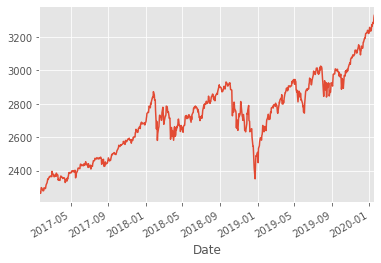

In [3]:
#FOR S&P 500 (^GSPC)
start = dt.datetime(2017, 1, 20)
end = dt.datetime(2020, 1, 20)

df_SP500 = web.DataReader('^GSPC', 'yahoo', start, end)
print(df_SP500.shape)

print(df_SP500.head(5))
print(df_SP500.tail(5))

df_SP500["Close"].plot()
plt.show()

#Save CSV
df_SP500.to_csv('../datasets/trading/SP500.csv', sep='\t')

### Import S&P500 data

In [4]:
# Read S&P500 file as csv
trade = pd.read_csv('../datasets/trading/SP500.csv', sep='\t')

In [5]:
trade.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-19,2274.330078,2258.409912,2271.899902,2263.689941,3165970000,2263.689941
1,2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059
2,2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951
3,2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068
4,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117


In [6]:
trade.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

#### Create columns for trading metrics 

In [7]:
# Calculate Return: Use pct_change() function to add the one day returns to the dataframe 
trade_pctchange_close = trade.Close.pct_change() # i.e. (Close[Day] - Close[Day-1])/Close[Day-1])
trade['Return'] = trade_pctchange_close

# Calculate Intraday Return 
trade_intraday_return  = ((trade['Close'].sub(trade['Open']).div(trade['Open']))).fillna(0)
trade['Intraday Return'] = trade_intraday_return # i.e. (Open[Day] - Close[Day]) * 100

# Calculate Volume Return: Use pct_change() function to add the one day returns to the dataframe 
trade_pctchange_vol = trade.Volume.pct_change() # i.e. (Close[Day] - Close[Day-1])/Close[Day-1])
trade['Volume Return'] = trade_pctchange_vol

# Calculate Open-Close Movement 
trade_oc_move = ((trade['Open'].sub(trade['Close'].shift()).div(trade['Close'].shift()))*100).fillna(0)
trade['Open-Close Movement'] = trade_oc_move # i.e. (Open[Day] - Close[Day-1]) * 100

# Calculate High-Low Ratio
trade_hl_ratio = ((trade['High'].sub(trade['Low']).div(trade['Low']))*100).fillna(0)
trade['High-Low Ratio'] = trade_hl_ratio # i.e. (High[Day] - Low[Day]) * 100

trade.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio
0,2017-01-19,2274.330078,2258.409912,2271.899902,2263.689941,3165970000,2263.689941,NaN,-0.003614,NaN,0.000000,0.704928
1,2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589
2,2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960
3,2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905
4,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174


### Import Trump's tweet data

In [8]:
# Read Cleaned Trump's Tweets as csv
tweets = pd.read_csv('../datasets/tweets/cleaned_tweets_sum_df.csv', sep='\t')

In [9]:
#Renaming the respective columns
tweets.rename(columns={tweets.columns[0]:'Date'}, inplace=True)

In [10]:
tweets.head()

,Date,retweet_count,favorite_count,vader compound,vader sentiment
0,2017-01-19,84547,466823,2.4754,positive
1,2017-01-20,415061,1878671,2.2815,positive
2,2017-01-21,23337,177579,0.8807,positive
3,2017-01-22,184236,949408,1.5419,positive
4,2017-01-23,26750,177839,0.4939,positive


### Combine Trade and Tweet data

In [11]:
combined_trade_tweets = pd.merge(trade, tweets, on='Date')

In [12]:
combined_trade_tweets.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,vader sentiment
0,2017-01-19,2274.330078,2258.409912,2271.899902,2263.689941,3165970000,2263.689941,NaN,-0.003614,NaN,0.000000,0.704928,84547,466823,2.4754,positive
1,2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,positive
2,2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,positive
3,2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,positive
4,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,positive


In [13]:
# Drop null values 
combined_trade_tweets = combined_trade_tweets.dropna()

# Check for nulls in columns
combined_trade_tweets.isnull().sum()

Date                   0
High                   0
Low                    0
Open                   0
Close                  0
Volume                 0
Adj Close              0
Return                 0
Intraday Return        0
Volume Return          0
Open-Close Movement    0
High-Low Ratio         0
retweet_count          0
favorite_count         0
vader compound         0
vader sentiment        0
dtype: int64

## Create a Trump index 

The sentiment scores (vader compound column) of Trump's Tweet are transformed into a series by multiplying the sum of the sentiment score of all tweets for each day with the return of the S&P that same day. 

When applying the scores, it is assumed that investors are loss averse i.e. the sadness that they get from a loss is greater than the happiness they gain of the same magnitude. This is why a negative tweet has a higher magnitude than a positive one. Also, one may expect a neutral tweet to be given a score of 0 — here, we assumed that the steady-state of the stock market was above zero, as trend global growth is above zero. The actual arbitrary numbers of the sentiment scores come from my own assumptions and are only used as a means to scale the sentiment scores to the S&P500 returns.

For the modelling, it is important that the returns is used rather than raw prices, as returns make the series stationary (one may use a Dickey-Fuller test to confirm this, which has not been used here). 

In [14]:
df = combined_trade_tweets

In [15]:
df['Trump Twitter Index'] = ((df['Intraday Return']*100)*(df['vader compound']).fillna(0))

In [16]:
df['Close_TTI'] = (((df['Trump Twitter Index']*100)/(df['Open']))+(df['Open']).fillna(0))

In [17]:
df['Volume_TTI'] = ((df['Volume'])*(df['vader compound']).fillna(0))

In [18]:
#df['Trump Twitter Index'] = ((df['Return']*100)*(df['vader compound']).fillna(0))

In [19]:
#df['Close_TTI'] = (((df['Trump Twitter Index']*100)/(df['Close'].shift()))+(df['Close'].shift()).fillna(0))

In [20]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Return,Intraday Return,Volume Return,Open-Close Movement,High-Low Ratio,retweet_count,favorite_count,vader compound,vader sentiment,Trump Twitter Index,Close_TTI,Volume_TTI
1,2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3524970000,2271.310059,0.003366,0.000595,0.113393,0.276982,0.527589,415061,1878671,2.2815,positive,0.135696,2269.965939,8.042219e+09
2,2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3152710000,2265.199951,-0.002690,-0.001138,-0.105607,-0.155418,0.653960,26750,177839,0.4939,positive,-0.056192,2267.777551,1.557123e+09
3,2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3810960000,2280.070068,0.006565,0.005375,0.208789,0.118309,0.791905,247498,1162781,1.6901,positive,0.908453,2267.919940,6.440903e+09
4,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,0.008026,0.004146,0.009200,0.386383,0.466174,138054,761424,0.7527,positive,0.312087,2288.893518,2.894899e+09
5,2017-01-26,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,-0.000735,-0.000848,-0.061274,0.011302,0.301206,128887,609647,-0.4878,negative,0.041381,2298.631683,-1.761134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,2020-01-13,3288.129883,3268.429932,3271.129883,3288.129883,3456380000,3288.129883,0.006976,0.005197,0.075759,0.177004,0.602734,268945,1381607,-0.7894,negative,-0.410250,3271.117341,-2.728466e+09
751,2020-01-14,3294.250000,3277.189941,3285.350098,3283.149902,3665130000,3283.149902,-0.001515,-0.000670,0.060396,-0.084540,0.520570,291642,1396729,4.0937,positive,-0.274155,3285.341753,1.500394e+10
752,2020-01-15,3298.659912,3280.689941,3282.270020,3289.290039,3716840000,3289.290039,0.001870,0.002139,0.014109,-0.026800,0.547750,99948,424979,1.2886,positive,0.275602,3282.278416,4.789520e+09
753,2020-01-16,3317.110107,3302.820068,3302.969971,3316.810059,3535080000,3316.810059,0.008367,0.004190,-0.048902,0.415893,0.432662,295611,1444412,4.3147,positive,1.807943,3303.024708,1.525281e+10


#### Save CSV: Combined Data

In [21]:
df.to_csv('../datasets/tweets/combined_trump_index.csv', sep='\t')

## EDA: Combined Data

In [22]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

### Correlation Heatmap

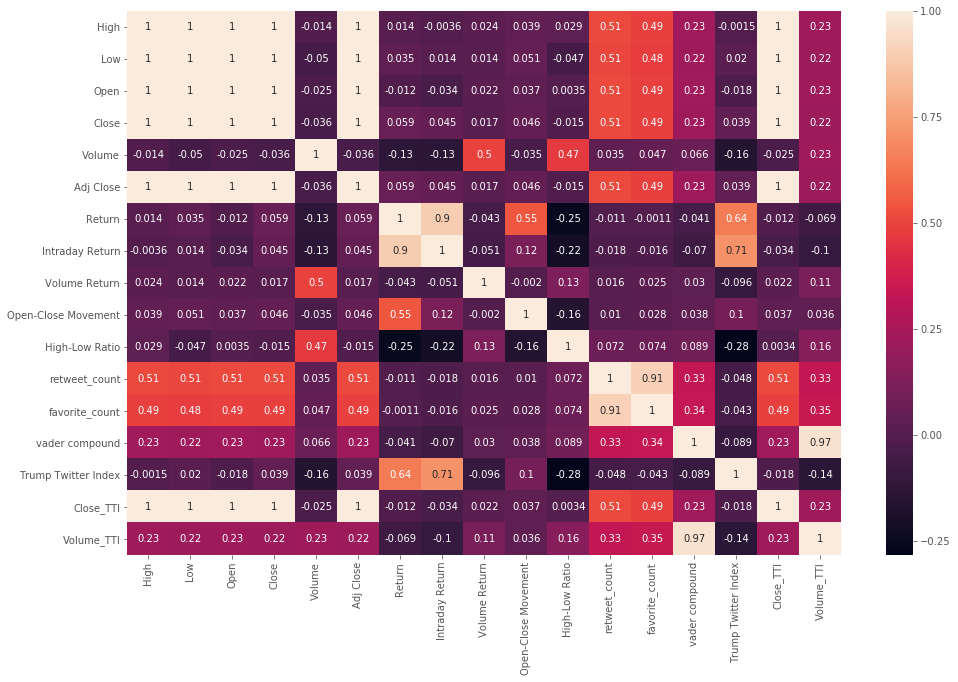

In [23]:
fig, ax = plt.subplots(figsize=(16,10)) 
sns.heatmap(df.corr(),annot=True);

In [24]:
df=df.drop(['vader sentiment'], axis=1)

In [25]:
# Change date column to be datetime dtype
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date                   datetime64[ns]
High                          float64
Low                           float64
Open                          float64
Close                         float64
Volume                          int64
Adj Close                     float64
Return                        float64
Intraday Return               float64
Volume Return                 float64
Open-Close Movement           float64
High-Low Ratio                float64
retweet_count                   int64
favorite_count                  int64
vader compound                float64
Trump Twitter Index           float64
Close_TTI                     float64
Volume_TTI                    float64
dtype: object

In [26]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df = df.resample('M').mean()

### Scatterplot: Trump Twitter Index vs S&P500 Return

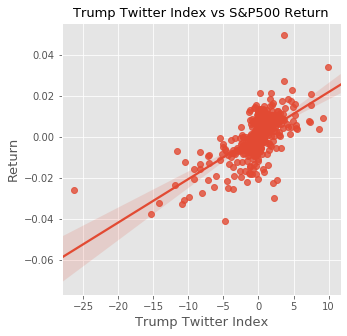

In [27]:
ax = plt.subplots(figsize=(5,5))
ax = sns.regplot(y='Return', x='Trump Twitter Index', data=combined_trade_tweets[['Return','Trump Twitter Index']])
ax.set_title('Trump Twitter Index vs S&P500 Return',fontsize=13)
ax.set_xlabel('Trump Twitter Index',fontsize=13)
ax.set_ylabel('Return',fontsize=13);

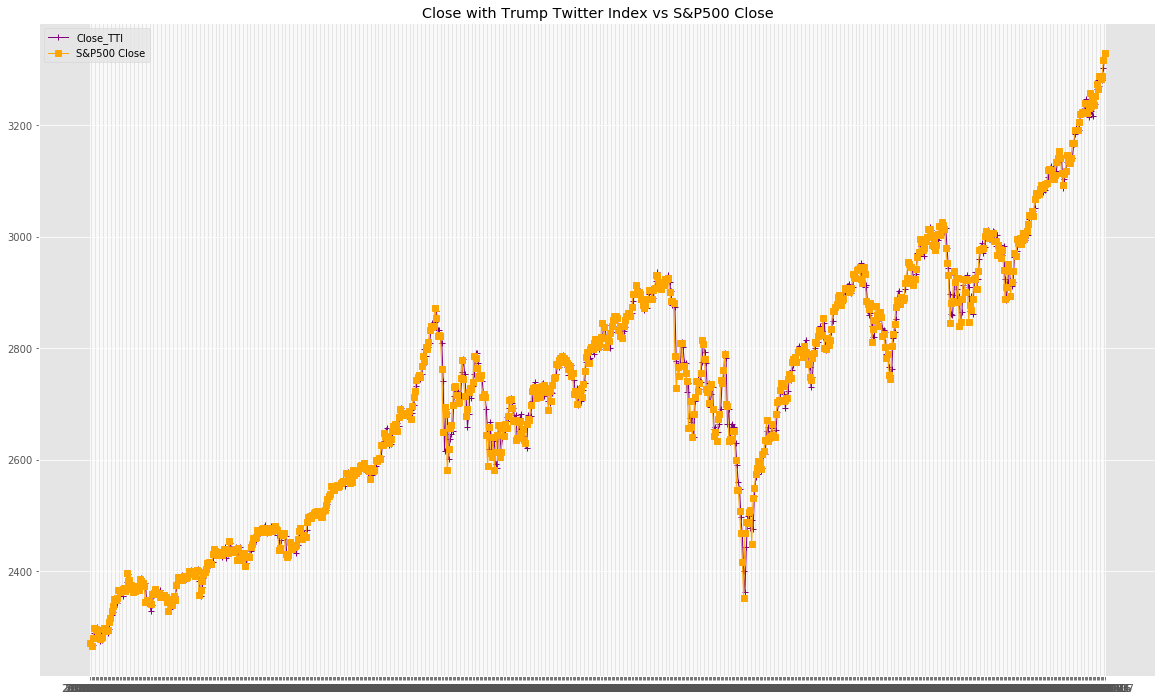

In [28]:
plt.figure(figsize=(20,12))
x_axis = combined_trade_tweets['Date']
plt.title('Close with Trump Twitter Index vs S&P500 Close')

# Create a handle for each plot
Score = plt.plot(x_axis, combined_trade_tweets['Close_TTI'], marker="+",color="Purple",linewidth=1, label="Close_TTI")
Close = plt.plot(x_axis, combined_trade_tweets['Close'], marker="s", color="Orange", linewidth=1, label="Close")
plt.legend((Score[0],Close[0]), ('Close_TTI','S&P500 Close'))
plt.show()

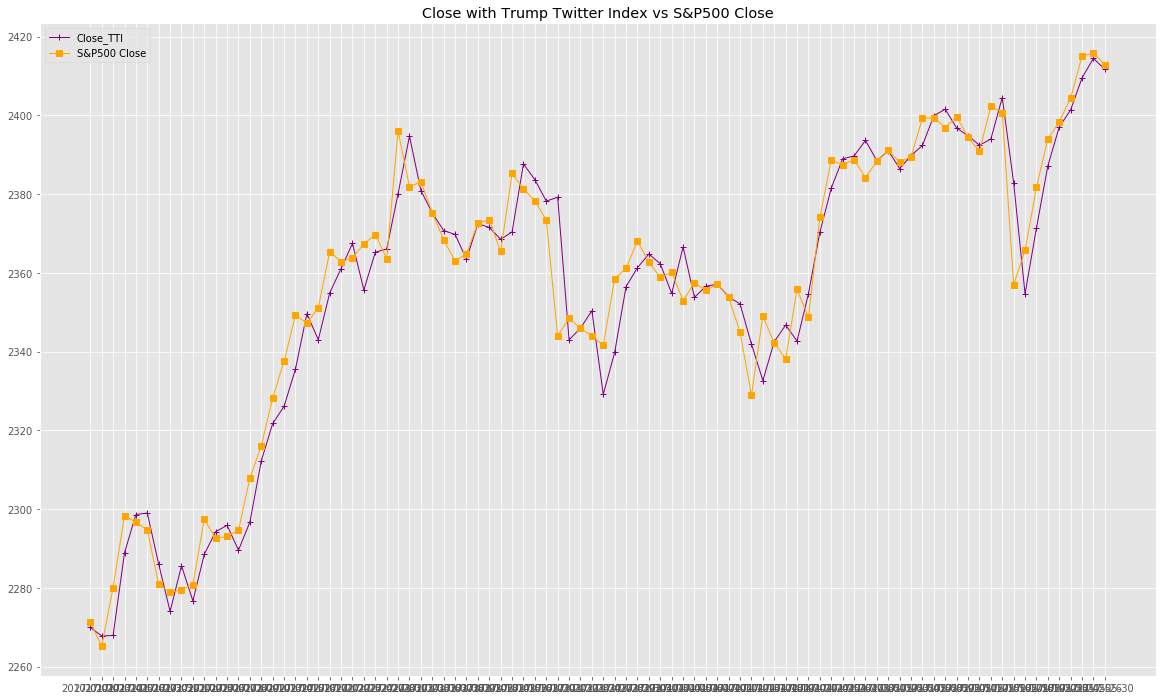

In [29]:
plt.figure(figsize=(20,12))
x_axis = combined_trade_tweets['Date'].iloc[:90]
plt.title('Close with Trump Twitter Index vs S&P500 Close')

# Create a handle for each plot
Score = plt.plot(x_axis, combined_trade_tweets['Close_TTI'].iloc[:90], marker="+",color="Purple",linewidth=1, label="Close_TTI")
Close = plt.plot(x_axis, combined_trade_tweets['Close'].iloc[:90], marker="s", color="Orange", linewidth=1, label="Close")
plt.legend((Score[0],Close[0]), ('Close_TTI','S&P500 Close'))
plt.show()

> <b> Interpretation</b>
>
>Visually, there appears to be a moving trend of the stock market (S&P500) and Trump’s tweets. From the correlation map, there is a positive correlation of 0.78 which implies that Trump’s tweets do in fact move with the stock market (S&P500). However, importantly, correlation does not imply causation. In other words, there is no indication of the direction of the relationship. 
>
>There are also many individual factors that may affect stock returns such as interest rates, inflation expectations, and other idiosyncratic factors. The interpretation of the relationship found is more likely that the tweets coincide with market-moving events such as a surprising economic data release or a monetary policy decision after markets have reacted to the data. 

> Upon performing the above EDA, the information provided appears to be relevant to the problem statement. Hence, considered likely to be able to answer their problem statement with the provided data given. As such, I am able to move on to the next part of the project - modelling